In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy

import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

dyn.get_all_dependencies_version()

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,scikit-learn,dynamo-release,cvxopt,pandas,scipy,numpy,colorcet,networkx,pre-commit,loompy,openpyxl,matplotlib,get-version,tqdm,setuptools
version,0.5.3,0.5.7,0.9.11,0.9.40,0.11.2,0.13.2,0.55.1,1.0.2,1.1.0,1.3.0,1.4.2,1.7.3,1.21.5,2.0.6,2.7.1,2.19.0,3.0.7,3.0.9,3.5.1,3.5.4,4.64.0,61.2.0


In [3]:
adata = dyn.read_h5ad('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'


In [4]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [5]:
dyn.tl.dynamics(adata)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [14.1080s]


estimating gamma: 100%|██████████| 2000/2000 [01:01<00:00, 32.40it/s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

In [6]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.2813s]


In [7]:
dyn.tl.cell_velocities(adata)

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [6.7171s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.8652s]


AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'clusters_colors', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u

In [11]:
dyn.vf.VectorField(adata,basis = 'umap')

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] in progress: 100.0000%
|-----> [SparseVFC] finished [0.3463s]
|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> <insert> control_point_umap to obs in AnnData Object.
|-----> <insert> inlier_prob_umap to obs in AnnData Object.
|-----> <insert> obs_vf_angle_umap to obs in AnnData Object.
|-----> [VectorField] in progress: 100.0000%
|-----> [VectorField] finished [0.5581s]


|-----------> plotting with basis key=X_umap


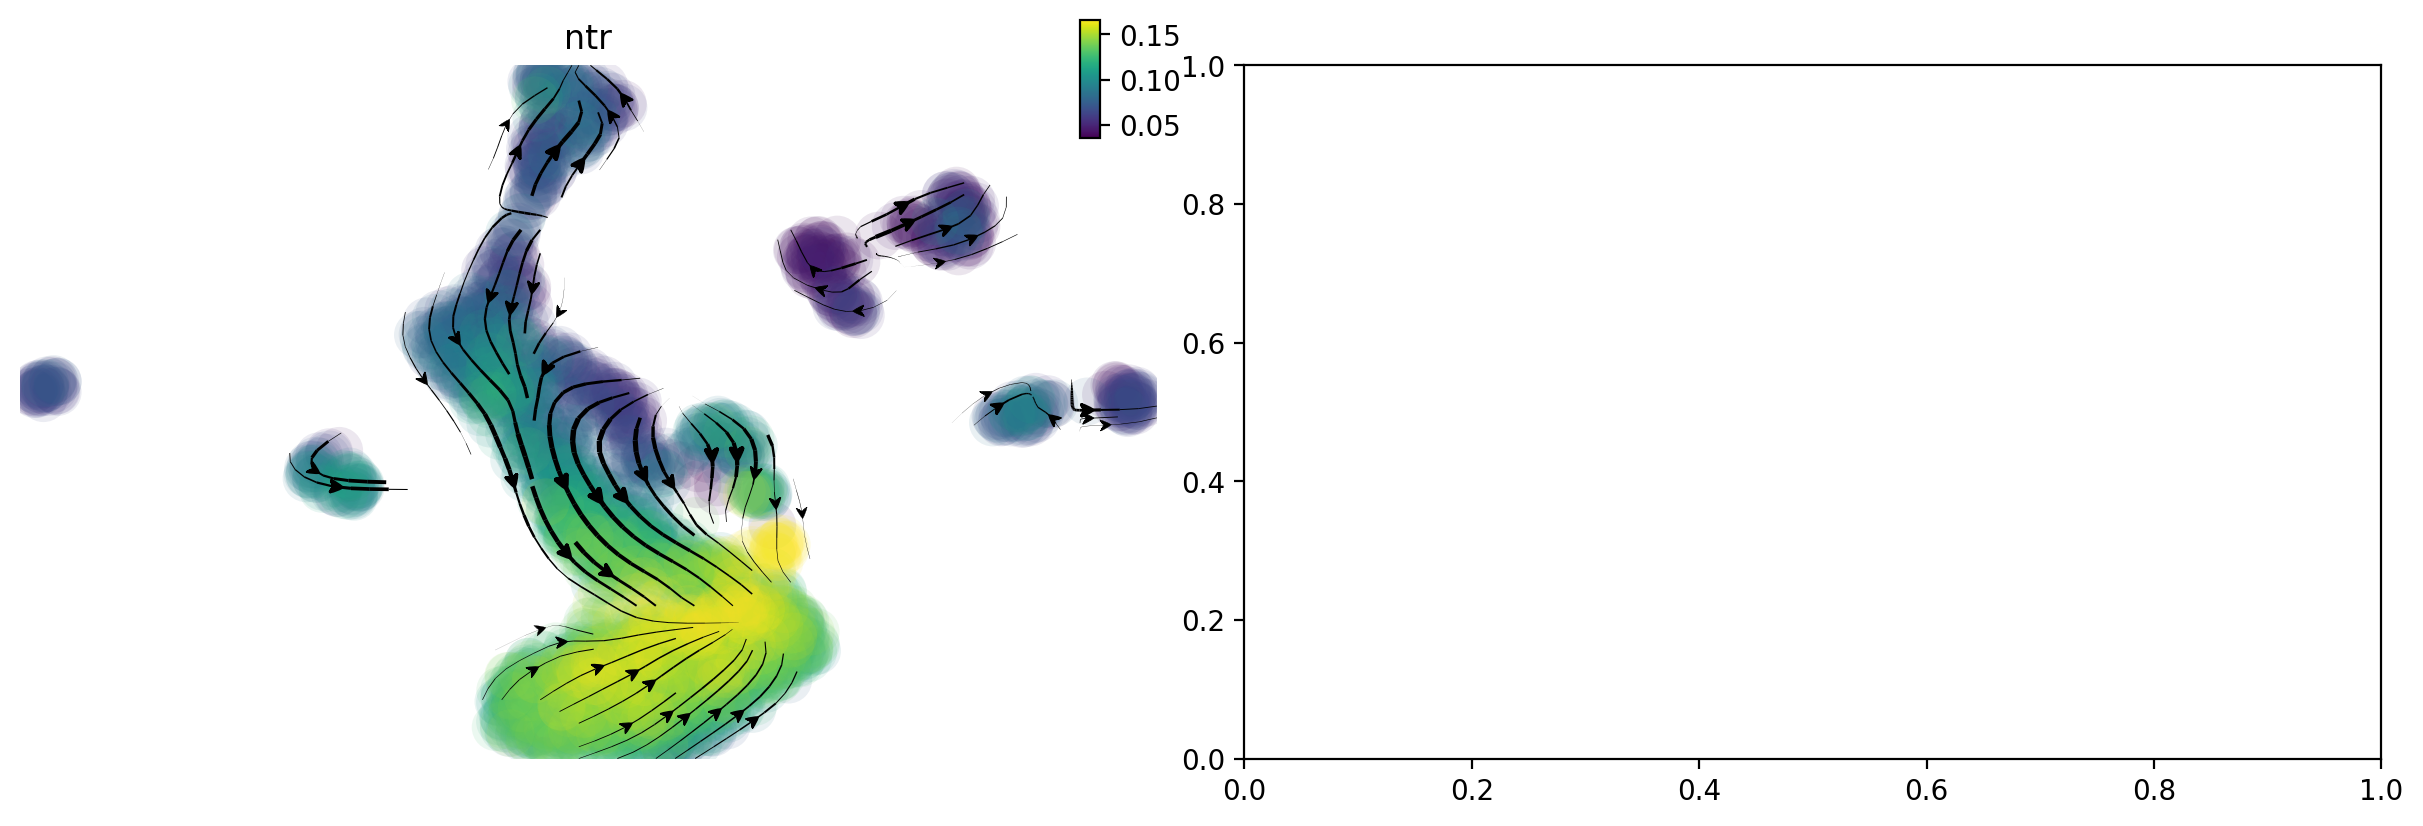

In [21]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 4))
f1_axes[0] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[0], show_legend='right', save_show_or_return='return')
# f1_axes[0].set_title('splicing')
# f1_axes[1] = dyn.pl.streamline_plot(adata, color_key_cmap = 'viridis', basis='umap', ax=f1_axes[1], show_legend='right', save_show_or_return='return')
# f1_axes[1].set_title('labeling')
plt.show()

In [23]:
import eval_util as ev

cluster_edges = [("OPC", "OL")]
ev.evaluate(adata, cluster_edges, 'clusters', "stc_velocity")

KeyError: 'stc_velocity_graph'